<a href="https://colab.research.google.com/github/Yves54/mlpack/blob/main/customer_spending_habits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://github.com/Yves54/mlpack/blob/main/SalesForCourse_quizz_table.csv?raw=true')

In [3]:
df.head()

index      Date    Year     Month  Customer Age Customer Gender  \
0      0  02/19/16  2016.0  February          29.0               F   
1      1  02/20/16  2016.0  February          29.0               F   
2      2  02/27/16  2016.0  February          29.0               F   
3      3  03/12/16  2016.0     March          29.0               F   
4      4  03/12/16  2016.0     March          29.0               F   

         Country       State Product Category     Sub Category  Quantity  \
0  United States  Washington      Accessories  Tires and Tubes       1.0   
1  United States  Washington         Clothing           Gloves       2.0   
2  United States  Washington      Accessories  Tires and Tubes       3.0   
3  United States  Washington      Accessories  Tires and Tubes       2.0   
4  United States  Washington      Accessories  Tires and Tubes       3.0   

   Unit Cost  Unit Price   Cost  Revenue  Column1  
0      80.00  109.000000   80.0    109.0      NaN  
1      24.50   28.500000   49.0     57.0      NaN  
2       3.67    5.000000   11.0     15.0      NaN  
3      87.50  116.500000  175.0    233.0      NaN  
4      35.00   41.666667  105.0    125.0      NaN

In [4]:
df.shape

(34867, 16)

In [5]:
df.isnull().sum()

index                   0
Date                    1
Year                    1
Month                   1
Customer Age            1
Customer Gender         1
Country                 1
State                   1
Product Category        1
Sub Category            1
Quantity                1
Unit Cost               1
Unit Price              1
Cost                    1
Revenue                 0
Column1             32293
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             34867 non-null  int64  
 1   Date              34866 non-null  object 
 2   Year              34866 non-null  float64
 3   Month             34866 non-null  object 
 4   Customer Age      34866 non-null  float64
 5   Customer Gender   34866 non-null  object 
 6   Country           34866 non-null  object 
 7   State             34866 non-null  object 
 8   Product Category  34866 non-null  object 
 9   Sub Category      34866 non-null  object 
 10  Quantity          34866 non-null  float64
 11  Unit Cost         34866 non-null  float64
 12  Unit Price        34866 non-null  float64
 13  Cost              34866 non-null  float64
 14  Revenue           34867 non-null  float64
 15  Column1           2574 non-null   float64
dtypes: float64(8), int64(1), object(7)
memor

In [7]:
df.describe()

index          Year  Customer Age      Quantity     Unit Cost  \
count  34867.000000  34866.000000  34866.000000  34866.000000  34866.000000   
mean   17433.000000   2015.569237     36.382895      2.002524    349.880567   
std    10065.380254      0.495190     11.112902      0.813936    490.015846   
min        0.000000   2015.000000     17.000000      1.000000      0.670000   
25%     8716.500000   2015.000000     28.000000      1.000000     45.000000   
50%    17433.000000   2016.000000     35.000000      2.000000    150.000000   
75%    26149.500000   2016.000000     44.000000      3.000000    455.000000   
max    34866.000000   2016.000000     87.000000      3.000000   3240.000000   

         Unit Price          Cost       Revenue      Column1  
count  34866.000000  34866.000000  34867.000000  2574.000000  
mean     389.232485    576.004532    640.870093   688.054913  
std      525.319091    690.500395    736.640033   774.200897  
min        0.666667      2.000000      2.000000     2.000000  
25%       53.666667     85.000000    102.000000   104.250000  
50%      179.000000    261.000000    319.000000   390.500000  
75%      521.000000    769.000000    902.000000   975.750000  
max     5082.000000   3600.000000   5082.000000  3681.000000

# Missing Values Handling

Droping Column1

In [8]:
df.drop(['Column1'],axis=1,inplace=True) 
# Droping the column1 permanently

In [9]:
df.isnull().sum()

index               0
Date                1
Year                1
Month               1
Customer Age        1
Customer Gender     1
Country             1
State               1
Product Category    1
Sub Category        1
Quantity            1
Unit Cost           1
Unit Price          1
Cost                1
Revenue             0
dtype: int64

Droping rows with null values

In [10]:
df.dropna(inplace = True)
# Droping the rows with null values permanently

In [11]:
df.isnull().sum()

index               0
Date                0
Year                0
Month               0
Customer Age        0
Customer Gender     0
Country             0
State               0
Product Category    0
Sub Category        0
Quantity            0
Unit Cost           0
Unit Price          0
Cost                0
Revenue             0
dtype: int64

Checking for duplicate values

In [12]:
df.duplicated().sum()
#Checking for duplicates 

0

# Selecting features based on general requirements

Dropping index and date features 

In [13]:
df.drop(['index','Date'],axis=1,inplace=True)
#index and date featuers dropped permanently 

In [14]:
df.head()

Year     Month  Customer Age Customer Gender        Country       State  \
0  2016.0  February          29.0               F  United States  Washington   
1  2016.0  February          29.0               F  United States  Washington   
2  2016.0  February          29.0               F  United States  Washington   
3  2016.0     March          29.0               F  United States  Washington   
4  2016.0     March          29.0               F  United States  Washington   

  Product Category     Sub Category  Quantity  Unit Cost  Unit Price   Cost  \
0      Accessories  Tires and Tubes       1.0      80.00  109.000000   80.0   
1         Clothing           Gloves       2.0      24.50   28.500000   49.0   
2      Accessories  Tires and Tubes       3.0       3.67    5.000000   11.0   
3      Accessories  Tires and Tubes       2.0      87.50  116.500000  175.0   
4      Accessories  Tires and Tubes       3.0      35.00   41.666667  105.0   

   Revenue  
0    109.0  
1     57.0  
2     15.0  
3    233.0  
4    125.0

Create column displaying Gross Profit <br>
Gross Profit = Net Sales - CoGS <br>
Here, Net sales = Equivalent to revenue <br>
and CoGS = Cost of goods sold

In [15]:
df['G_Profit']=df['Revenue']-df['Cost']

In [16]:
df.head()

Year     Month  Customer Age Customer Gender        Country       State  \
0  2016.0  February          29.0               F  United States  Washington   
1  2016.0  February          29.0               F  United States  Washington   
2  2016.0  February          29.0               F  United States  Washington   
3  2016.0     March          29.0               F  United States  Washington   
4  2016.0     March          29.0               F  United States  Washington   

  Product Category     Sub Category  Quantity  Unit Cost  Unit Price   Cost  \
0      Accessories  Tires and Tubes       1.0      80.00  109.000000   80.0   
1         Clothing           Gloves       2.0      24.50   28.500000   49.0   
2      Accessories  Tires and Tubes       3.0       3.67    5.000000   11.0   
3      Accessories  Tires and Tubes       2.0      87.50  116.500000  175.0   
4      Accessories  Tires and Tubes       3.0      35.00   41.666667  105.0   

   Revenue  G_Profit  
0    109.0      29.0  
1     57.0       8.0  
2     15.0       4.0  
3    233.0      58.0  
4    125.0      20.0

Create column displaying gross profit per unit

In [17]:
df['G_Profit_per_unit']=df['Unit Price']-df['Unit Cost'] 

In [18]:
df.head()

Year     Month  Customer Age Customer Gender        Country       State  \
0  2016.0  February          29.0               F  United States  Washington   
1  2016.0  February          29.0               F  United States  Washington   
2  2016.0  February          29.0               F  United States  Washington   
3  2016.0     March          29.0               F  United States  Washington   
4  2016.0     March          29.0               F  United States  Washington   

  Product Category     Sub Category  Quantity  Unit Cost  Unit Price   Cost  \
0      Accessories  Tires and Tubes       1.0      80.00  109.000000   80.0   
1         Clothing           Gloves       2.0      24.50   28.500000   49.0   
2      Accessories  Tires and Tubes       3.0       3.67    5.000000   11.0   
3      Accessories  Tires and Tubes       2.0      87.50  116.500000  175.0   
4      Accessories  Tires and Tubes       3.0      35.00   41.666667  105.0   

   Revenue  G_Profit  G_Profit_per_unit  
0    109.0      29.0          29.000000  
1     57.0       8.0           4.000000  
2     15.0       4.0           1.330000  
3    233.0      58.0          29.000000  
4    125.0      20.0           6.666667

# EDA using Pandas Profiling

In [19]:
 #install using this command only 
 !pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Preparing metadata (setup.py) ... done


In [20]:
from pandas_profiling import ProfileReport

<ipython-input-20-e2a33329b6f0>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [21]:
profile = ProfileReport(df, title='Pandas Profiling Report')

In [22]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Data Cleaning using Klib Library

In [23]:
 #install using this command only
 !pip install klib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
import klib

In [25]:
klib.clean_column_names(df) # cleans and standardizes column names, also called inside data_cleaning()

year     month  customer_age customer_gender        country  \
0      2016.0  February          29.0               F  United States   
1      2016.0  February          29.0               F  United States   
2      2016.0  February          29.0               F  United States   
3      2016.0     March          29.0               F  United States   
4      2016.0     March          29.0               F  United States   
...       ...       ...           ...             ...            ...   
34861  2015.0     March          38.0               M         France   
34862  2016.0  February          38.0               M         France   
34863  2015.0     March          38.0               M         France   
34864  2015.0     April          38.0               M         France   
34865  2015.0    August          38.0               M         France   

                   state product_category     sub_category  quantity  \
0             Washington      Accessories  Tires and Tubes       1.0   
1             Washington         Clothing           Gloves       2.0   
2             Washington      Accessories  Tires and Tubes       3.0   
3             Washington      Accessories  Tires and Tubes       2.0   
4             Washington      Accessories  Tires and Tubes       3.0   
...                  ...              ...              ...       ...   
34861  Charente-Maritime            Bikes   Mountain Bikes       1.0   
34862     Hauts de Seine            Bikes   Mountain Bikes       2.0   
34863     Hauts de Seine            Bikes   Mountain Bikes       1.0   
34864     Hauts de Seine            Bikes   Mountain Bikes       3.0   
34865     Hauts de Seine            Bikes   Mountain Bikes       1.0   

       unit_cost   unit_price    cost  revenue  g_profit  g_profit_per_unit  
0          80.00   109.000000    80.0    109.0      29.0          29.000000  
1          24.50    28.500000    49.0     57.0       8.0           4.000000  
2           3.67     5.000000    11.0     15.0       4.0           1.330000  
3          87.50   116.500000   175.0    233.0      58.0          29.000000  
4          35.00    41.666667   105.0    125.0      20.0           6.666667  
...          ...          ...     ...      ...       ...                ...  
34861    2049.00  1487.000000  2049.0   1487.0    -562.0        -562.000000  
34862    1160.00   985.500000  2320.0   1971.0    -349.0        -174.500000  
34863    2049.00  1583.000000  2049.0   1583.0    -466.0        -466.000000  
34864     683.00   560.666667  2049.0   1682.0    -367.0        -122.333333  
34865    2320.00  1568.000000  2320.0   1568.0    -752.0        -752.000000  

[34866 rows x 15 columns]

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34866 entries, 0 to 34865
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               34866 non-null  float64
 1   month              34866 non-null  object 
 2   customer_age       34866 non-null  float64
 3   customer_gender    34866 non-null  object 
 4   country            34866 non-null  object 
 5   state              34866 non-null  object 
 6   product_category   34866 non-null  object 
 7   sub_category       34866 non-null  object 
 8   quantity           34866 non-null  float64
 9   unit_cost          34866 non-null  float64
 10  unit_price         34866 non-null  float64
 11  cost               34866 non-null  float64
 12  revenue            34866 non-null  float64
 13  g_profit           34866 non-null  float64
 14  g_profit_per_unit  34866 non-null  float64
dtypes: float64(9), object(6)
memory usage: 5.3+ MB


In [27]:
df=klib.convert_datatypes(df) # converts existing to more efficient dtypes, also called inside data_cleaning()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34866 entries, 0 to 34865
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   year               34866 non-null  float32 
 1   month              34866 non-null  category
 2   customer_age       34866 non-null  float32 
 3   customer_gender    34866 non-null  category
 4   country            34866 non-null  category
 5   state              34866 non-null  category
 6   product_category   34866 non-null  category
 7   sub_category       34866 non-null  category
 8   quantity           34866 non-null  float32 
 9   unit_cost          34866 non-null  float32 
 10  unit_price         34866 non-null  float32 
 11  cost               34866 non-null  float32 
 12  revenue            34866 non-null  float32 
 13  g_profit           34866 non-null  float32 
 14  g_profit_per_unit  34866 non-null  float32 
dtypes: category(6), float32(9)
memory usage: 2.7 MB


## EDA using Klib Library

GridSpec(6, 6)

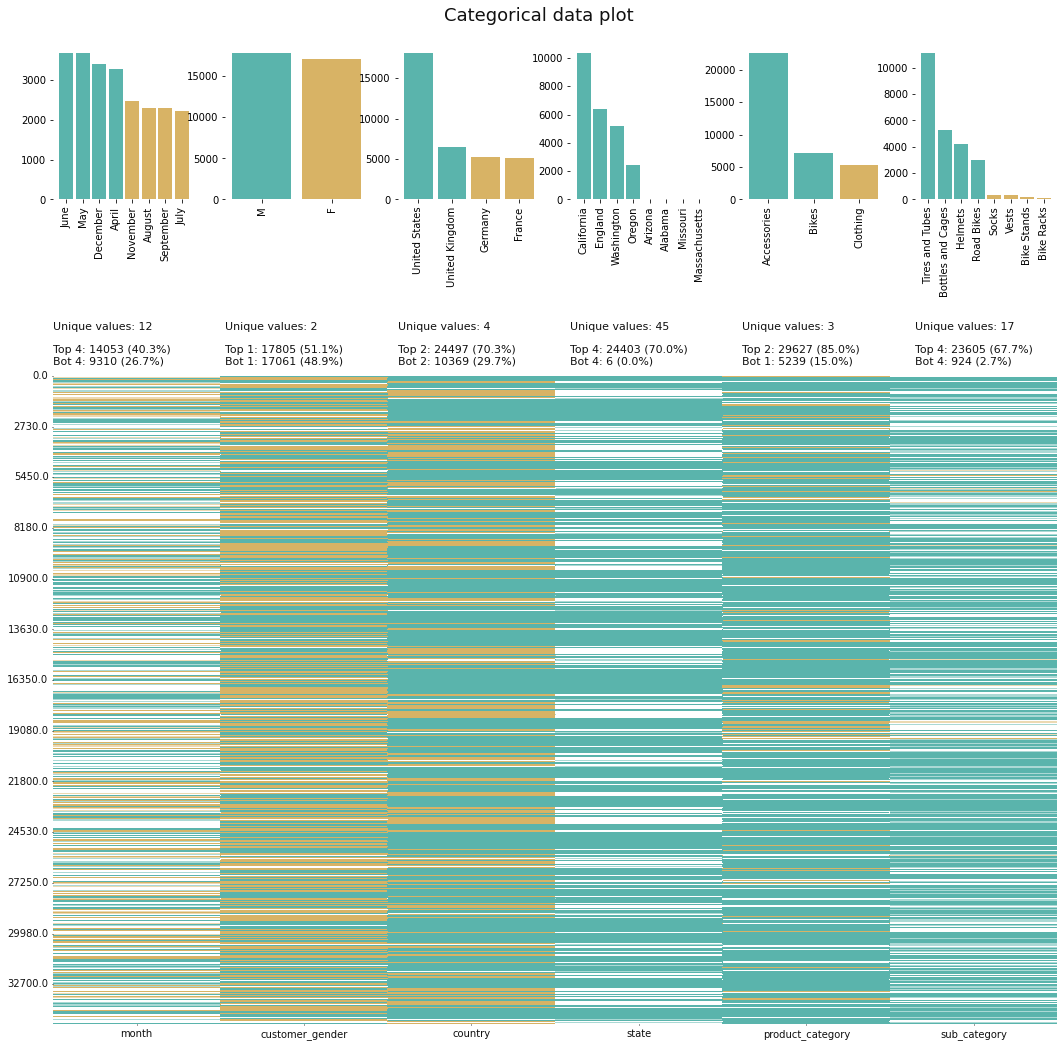

In [28]:
klib.cat_plot(df,top=4, bottom=4) # returns a visualization of the number and frequency of categorical features
# representation of the 4 most & 4 least common values in each categorical column

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


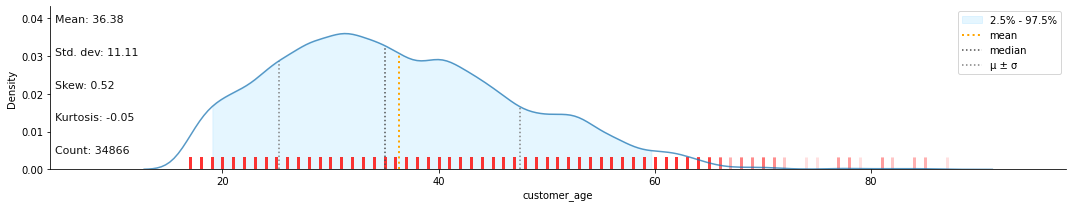

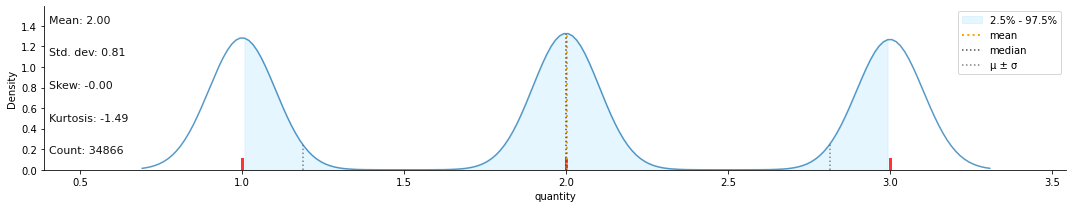

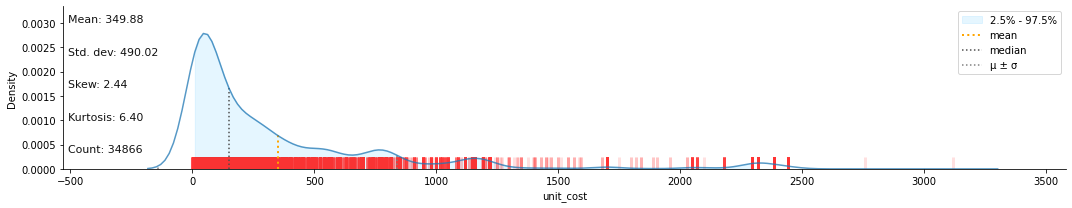

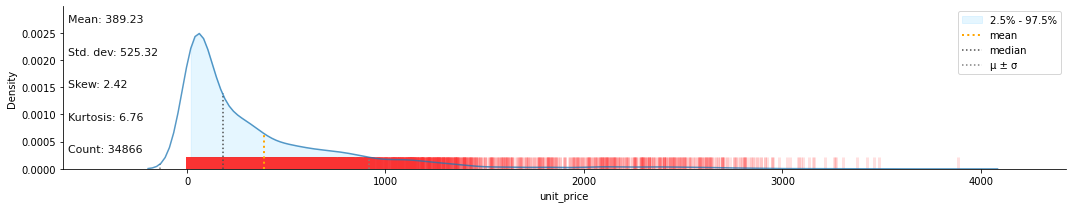

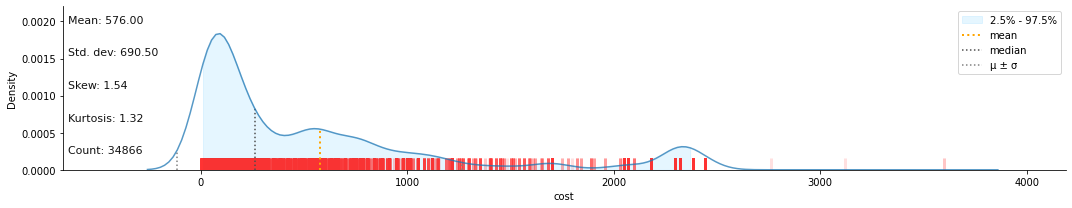

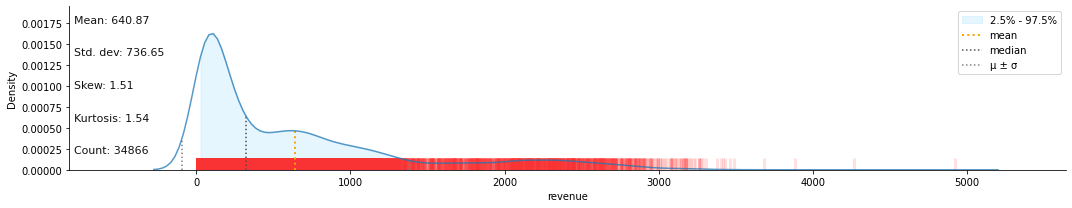

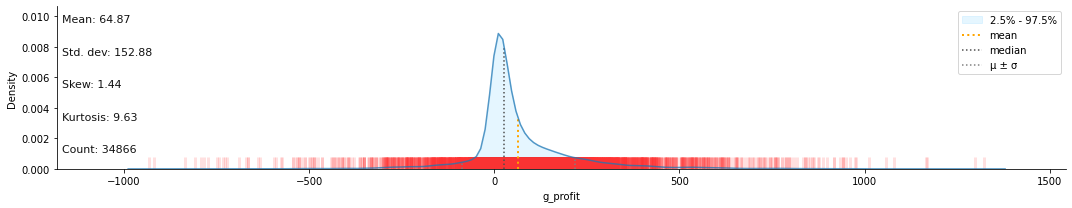

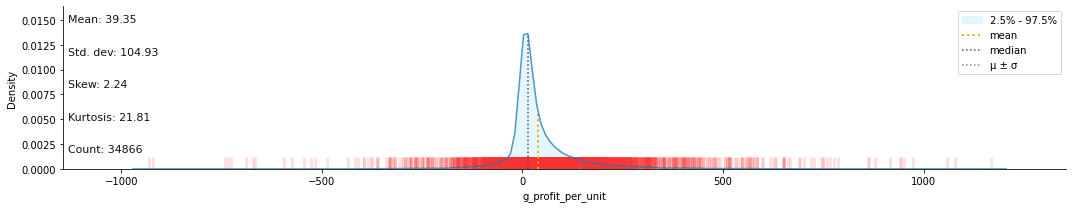

In [29]:
klib.dist_plot(df) # returns a distribution plot for every numeric feature

Comparing Gross Profit with other features

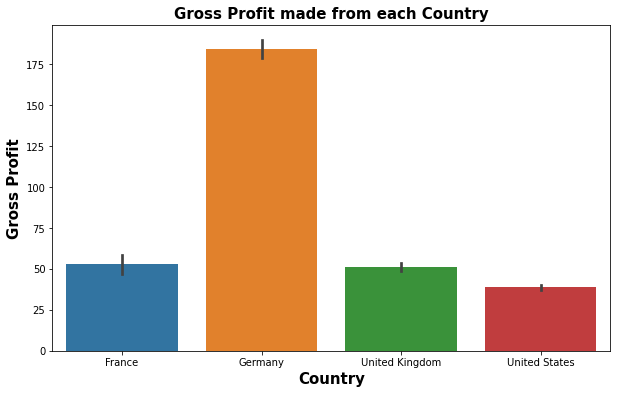

In [30]:
#Set the width and height of the figure
plt.figure(figsize=(10,6))
#Set featuers for barplot
gpc = sns.barplot(x=df['country'], y=df['g_profit'])
#Add Title
plt.title("Gross Profit made from each Country",fontweight ='bold', fontsize = 15)
#Customize labels
plt.xlabel('Country', fontweight ='bold', fontsize = 15)
plt.ylabel('Gross Profit', fontweight ='bold', fontsize = 15)
plt.show(gpc)

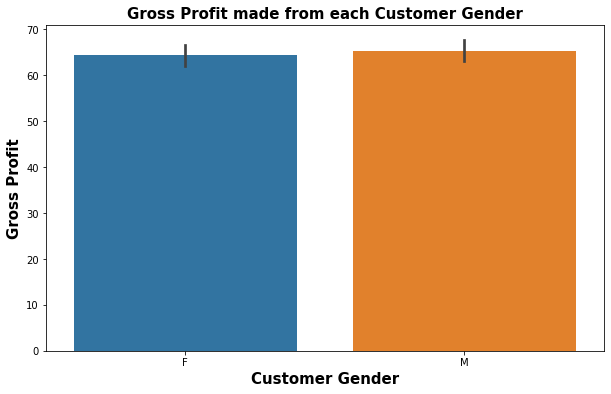

In [31]:
#Set the width and height of the figure
plt.figure(figsize=(10,6))
#Set featuers for barplot
gpa = sns.barplot(x=df['customer_gender'], y=df['g_profit'])
#Add Title
plt.title("Gross Profit made from each Customer Gender",fontweight ='bold', fontsize = 15)
#Customize labels
plt.xlabel('Customer Gender', fontweight ='bold', fontsize = 15)
plt.ylabel('Gross Profit', fontweight ='bold', fontsize = 15)
plt.show(gpa)

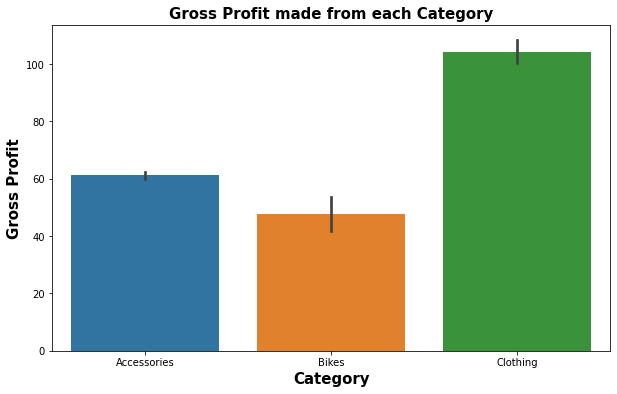

In [32]:
#Set the width and height of the figure
plt.figure(figsize=(10,6))
#Set featuers for barplot
gppc = sns.barplot(x=df['product_category'], y=df['g_profit'])
#Add Title
plt.title("Gross Profit made from each Category",fontweight ='bold', fontsize = 15)
#Customize labels
plt.xlabel('Category', fontweight ='bold', fontsize = 15)
plt.ylabel('Gross Profit', fontweight ='bold', fontsize = 15)
plt.show(gppc)